# ¿Y éste qué raza es?

Dependiendo de a quién se le pregunte, se pueden encontrar respuestas muy variadas en cuanto a la cantidad de razas de perros conocidas. Puntualmente, la respuesta que brinda la Federación Cinológica Internacional (FCI), es que existen 368 razas reconocidas a título provisional.

Ante la gran diversidad, se presenta éste proyecto, que tiene la intención de brindar una funcionalidad que permita lograr determinar mediante la lectura de una imagen cargada por el usuario, de qué raza se trata el perro en cuestión.

Para lograr el propósito deseado, se establecea un modelo predictivo basado en el entrenamiento de Redes Neuronales Convolucionales (CNN), que aprende de un conjunto de datos conformado por 12000 imágenes de 120 razas de perros diferentes.

## Librerías
Se importan las librerías necesarias para llevar adelante el modelo.

In [1]:
import os
import cv2
from utils import mining_data_tb as md_tb
from utils import folders_tb as f_tb
from utils import visualization_tb as v_tb
from utils import models as mo_tb
from utils import sql_tb
import pandas as pd
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
seed = 42

## Directorios dataset
Se definen las rutas de los conjuntos de TRAIN y TEST que contienen las imágenes necesarias tanto para entrenar el modelo como para probar qué tan bien trabaja.

In [3]:
train_dir = '..' + os.sep + 'data' + os.sep + 'fotos_perros' + os.sep + 'train'
test_dir = '..' + os.sep + 'data' + os.sep + 'fotos_perros' + os.sep + 'test'

## Nombres de las carpetas
Los nombres de las carpetas que se encuentran en los conjuntos de TRAIN y TEST tienen la siguiente forma:

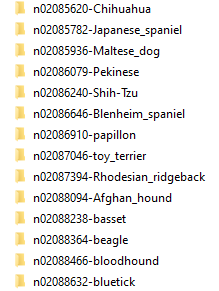

In [4]:
nombre_carpetas_originales = Image.open('..' + os.sep + 'resources' + os.sep +'nombre_carpetas_original.png','r')
nombre_carpetas_originales

## Renombrando las carpetas

Con la finalidad de utilizar el nombre de la carpeta como **label** para las imágenes que se encuentran dentro de ella, resulta conveniente que su nombre sea tal como la raza a la que corresponde.

Este proceso debe realizarse tanto con las carpetas que se encuentran en el conjunto de **train**, como en el de **test**.

In [5]:
# Este código debe ejecutarse una única vez para que las carpetas mantengan sus nombres.

# md_tb.renombrar_carpetas('train')

In [6]:
os.listdir(train_dir)[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

In [7]:
# Este código debe ejecutarse una única vez para que las carpetas mantengan sus nombres.

# md_tb.renombrar_carpetas('test')

In [8]:
os.listdir(test_dir)[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

Se verifica que efectivamente ambos conjuntos han quedado con los mismos nombres de carpetas, lo que conllevará a que las imágenes en su interior tengan la misma **etiqueta**.

In [9]:
os.listdir(train_dir) == os.listdir(test_dir)

True

Ahora, los nombres que las carpetas de los conjuntos de TRAIN y TEST tienen la siguiente forma:

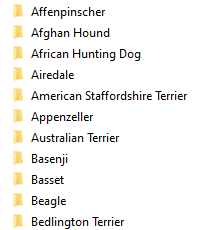

In [10]:
nombre_carpetas_labels = Image.open('..' + os.sep + 'resources' + os.sep +'nombre_carpetas_labels.png','r')
nombre_carpetas_labels

## Cantidad de razas
Se puede observar el número total de razas (labels) con los que será entrenado nuestro modelo.

In [11]:
raza_list = os.listdir(train_dir)
print("Número total de razas:", len(raza_list))

Número total de razas: 120


In [12]:
raza_list[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

In [13]:
razas = raza_list

## Carga de datos
Se cargan los datos con los que trabajará el modelo (imágenes) y se los lleva al formato necesario para poder introducirlos en el modelo. Dentro de la función que carga las imágenes, se encuentra el primer procesamiento que se le realiza a las mismas: Una reducción de resolución. Inicialmente, los datos tienen una dimensión de 224 x 224 pixels, la cual es reducida a 64 x 64. Esto ayuda a que el modelo pueda ser entrenado con una mayor cantidad de imágenes en un menor tiempo.

In [27]:
lista_imagenes = []
lista_labels = []
for i, raza in enumerate(razas[0:3]):
    print(i)
    print(raza)
    count = 0
    for image_name in os.listdir(train_dir + os.sep + raza):
        print(count)
        print(image_name)
        count += 1
        if count>5:
            break
    imagen = cv2.imread(train_dir + os.sep + raza + os.sep + image_name)
    print(imagen)
    #    resized_imagen_foto = imagen_foto.resize((64, 64))
    #    lista_imagenes.append(np.array(resized_imagen_foto))
    #    lista_labels.append(i)

0
Affenpinscher
0
n02110627_10225.jpg
1
n02110627_10437.jpg
2
n02110627_10439.jpg
3
n02110627_10447.jpg
4
n02110627_10848.jpg
5
n02110627_10859.jpg
[[[153 181 192]
  [ 80 108 119]
  [ 89 117 128]
  ...
  [ 14  95  80]
  [ 21  86  77]
  [ 26  85  77]]

 [[102 128 140]
  [ 82 110 121]
  [110 136 148]
  ...
  [ 17  98  83]
  [ 22  87  78]
  [ 24  83  75]]

 [[ 64  89  99]
  [115 142 152]
  [156 181 191]
  ...
  [ 24 105  90]
  [ 27  92  83]
  [ 25  84  76]]

 ...

 [[203 216 218]
  [217 230 232]
  [229 242 244]
  ...
  [160 165 163]
  [167 172 170]
  [190 195 193]]

 [[215 228 230]
  [213 226 228]
  [224 237 239]
  ...
  [162 167 165]
  [165 170 168]
  [183 188 186]]

 [[230 243 245]
  [213 226 228]
  [219 232 234]
  ...
  [163 168 166]
  [162 167 165]
  [178 183 181]]]
1
Afghan Hound
0
n02088094_10715.jpg
1
n02088094_10982.jpg
2
n02088094_11006.jpg
3
n02088094_11172.jpg
4
n02088094_11432.jpg
5
n02088094_1145.jpg
[[[ 74  86  86]
  [ 70  84  83]
  [ 64  79  82]
  ...
  [ 30  61  28]
  [ 26

In [14]:
train_imagenes, train_labels = f_tb.cargar_imagenes_and_labels(razas, train_dir)

In [15]:
test_imagenes, test_labels = f_tb.cargar_imagenes_and_labels(razas, test_dir)

In [16]:
print('Imágenes train: ', len(train_imagenes))
print('Labels train: ', len(train_labels))
print('Tipo train_imagenes: ', type(train_imagenes), ' -  Tipo train_labels: ', type(train_labels))
print('\nImágenes test: ', len(test_imagenes))
print('Labels test: ', len(test_labels))
print('Tipo test_imagenes: ', type(test_imagenes), ' -  Tipo test_labels: ', type(test_labels))

Imágenes train:  12000
Labels train:  12000
Tipo train_imagenes:  <class 'list'>  -  Tipo train_labels:  <class 'list'>

Imágenes test:  8580
Labels test:  8580
Tipo test_imagenes:  <class 'list'>  -  Tipo test_labels:  <class 'list'>


In [17]:
train_imagenes = np.array(train_imagenes)
print('Shape train_imagenes: ', train_imagenes.shape)
train_labels = np.array(train_labels)
print('Shape train_labels: ', train_labels.shape)
test_imagenes = np.array(test_imagenes)
print('Shape test_imagenes: ', test_imagenes.shape)
test_labels = np.array(test_labels)
print('Shape test_labels: ', test_labels.shape)

Shape train_imagenes:  (12000, 64, 64, 3)
Shape train_labels:  (12000,)
Shape test_imagenes:  (8580, 64, 64, 3)
Shape test_labels:  (8580,)


Para que el conjunto de entrenamiento se encuentre más balanceado y homogéneo, se realiza una mezcla de sus datos junto con los de sus respectivos labels. De esta forma el modelo será entrenado recibiendo imágenes de una manera variada, logrando así que aprenda de los datos de una manera alternada.

In [18]:
n = np.arange(train_imagenes.shape[0])
print('Orden antes de mezclar:', n[:5])
np.random.seed(seed)
np.random.shuffle(n)
print('Orden después de mezclar:', n[:5])

Orden antes de mezclar: [0 1 2 3 4]
Orden después de mezclar: [1935 6494 1720 9120  360]


In [19]:
train_imagenes = train_imagenes[n]
train_labels = train_labels[n]

# Preprocesamiento

## Normalizando
Las imágenes están conformadas por 3 capas de color (RGB), las cuales, dependiendo de la intensidad del tono, tienen un valor que va desde el 0 hasta el 255. Se busca normalizar dicha escala para que los valores se sitúen entre 0 y 1

In [20]:
print('train_imagenes.max(): ', train_imagenes.max())
print('test_imagenes.max(): ', test_imagenes.max())
print('train_imagenes.min(): ', train_imagenes.min())
print('test_imagenes.min(): ', test_imagenes.min())

train_imagenes.max():  255
test_imagenes.max():  255
train_imagenes.min():  0
test_imagenes.min():  0


In [21]:
train_imagenes = train_imagenes/255
test_imagenes = test_imagenes/255

In [22]:
print('train_imagenes.max(): ', train_imagenes.max())
print('test_imagenes.max(): ', test_imagenes.max())
print('train_imagenes.min(): ', train_imagenes.min())
print('test_imagenes.min(): ', test_imagenes.min())

train_imagenes.max():  1.0
test_imagenes.max():  1.0
train_imagenes.min():  0.0
test_imagenes.min():  0.0


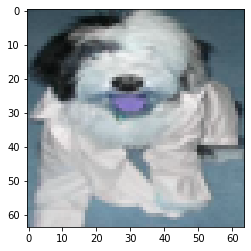

In [23]:
plt.imshow(train_imagenes[42]);

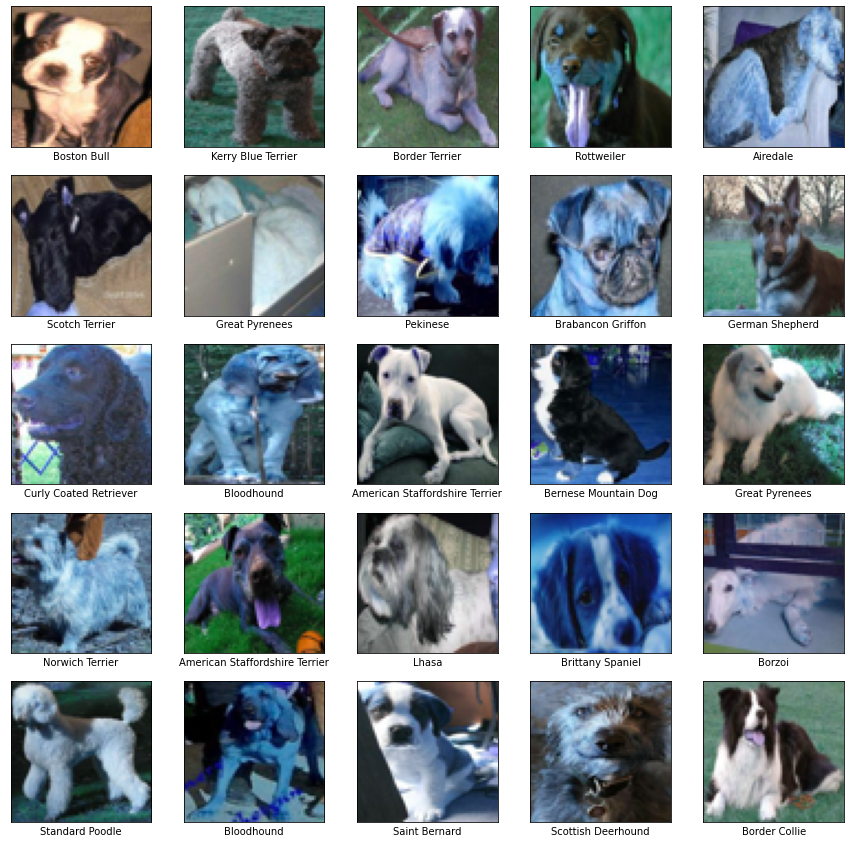

In [24]:
v_tb.plot_cuadricula_rgb(train_imagenes, raza_list, train_labels)

## Escala de grises
Otra práctica que suele utilizarse en problemas de clasificación de imágenes es reducir las 3 capas que le dan el color a una imagen (RGB), a una única capa. Se probarán modelos entrenados mediante ambas modalidades para ver con cuál se obtienen mejores resultados.

In [25]:
train_imagenes_gray = rgb2gray(train_imagenes)
test_imagenes_gray = rgb2gray(test_imagenes)

In [26]:
print('Shape train_imagenes_gray: ', train_imagenes_gray.shape)
print('Shape test_imagenes_gray: ', test_imagenes_gray.shape)

Shape train_imagenes_gray:  (12000, 64, 64)
Shape test_imagenes_gray:  (8580, 64, 64)


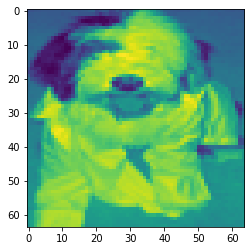

In [27]:
plt.imshow(train_imagenes_gray[42]);

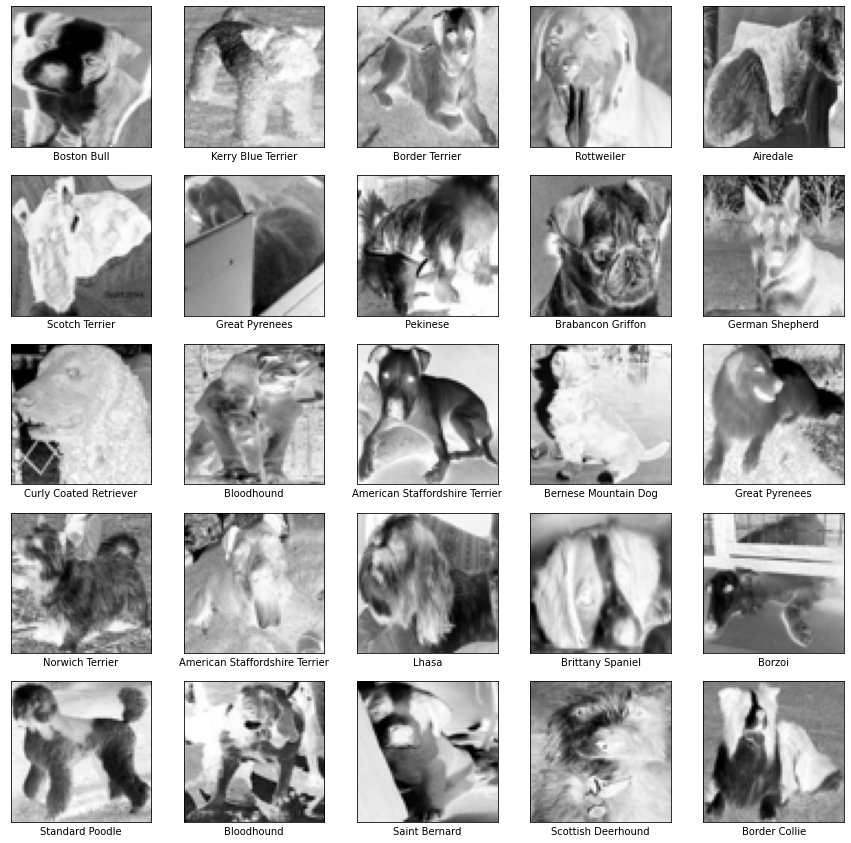

In [28]:
v_tb.plot_cuadricula_gray(train_imagenes_gray, raza_list, train_labels)

## Dividiendo conjunto TRAIN en TRAIN/VALIDACIÓN
A medida que se entrena el modelo, resulta conveniente que vaya realizando predicciones para tener una idea de qué tan eficiente está siendoo el entrenamiento. Para esto, dividen los datos del conjunto de **train**, donde se utilizará el 80% de los mismos para el entrenamiento, y el 20% para ir realizando las validaciones necesarias. Este proceso se realiza tanto para los modelados con imagenes RGB como los que utilicen una única dimensionalidad de color.

In [29]:
x_train, x_val , y_train, y_val = train_test_split(train_imagenes, train_labels, test_size=0.2, random_state= seed)

In [30]:
print('x_train.shape:', x_train.shape)
print('x_val.shape:', x_val.shape)
print('y_train.shape:', y_train.shape)
print('y_val.shape:', y_val.shape)

x_train.shape: (9600, 64, 64, 3)
x_val.shape: (2400, 64, 64, 3)
y_train.shape: (9600,)
y_val.shape: (2400,)


In [31]:
x_train_gray, x_val_gray , y_train_gray, y_val_gray = train_test_split(train_imagenes_gray, train_labels, test_size=0.2, random_state= seed)

In [32]:
print('x_train_gray.shape:', x_train_gray.shape)
print('x_val_gray.shape:', x_val_gray.shape)
print('y_train_gray.shape:', y_train_gray.shape)
print('y_val_gray.shape:', y_val_gray.shape)
print('x_val_gray.max():', x_val_gray.max())
print('x_val_gray.min():', x_val_gray.min())

x_train_gray.shape: (9600, 64, 64)
x_val_gray.shape: (2400, 64, 64)
y_train_gray.shape: (9600,)
y_val_gray.shape: (2400,)
x_val_gray.max(): 1.0
x_val_gray.min(): 0.0


## Modelados
Los modelos se basarán en redes neuronales convolutivas, las cuales suelen ser efectivas al utilizarlas en problemas de clasificación de imágenes. Contarán con una capa de salida **softmax**, con 120 neuronas, que darán como resultado una predicción de un array de tamaño 120 (un valor para cada raza), cuyos valores representarán el porcentaje de seguridad con el que la red predice que se trata de una u otra clase.

Además, los modelos se entrenarán con un determinado número de épocas, lo que representa que recibirá todo el conjunto de datos de entrenamiento cíclicamente tantas veces como épocas disponga. Al finalizar cada una, se mostrará el resultado de la **pérdida** para esa época, como la **precisión** para la misma. Finalmente, un optimizador ("adam" en este caso), será el encargado de ir actualizando los pesos que ingresan a cada capa provenientes de la capa anterior, para minimizar la función de coste.

## Model1

El primer modelo será entrenado con imágenes con 3 dimensionalidades de color.

In [26]:
model1 = models.Sequential()


model1.add(layers.Conv2D(filters=100,
                         kernel_size=(3,3),
                         input_shape = (64,64,3),
                         activation = 'relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Conv2D(filters=50,
                         kernel_size=(3,3),
                         activation = 'relu'))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.25))
model1.add(layers.Dense(32, activation ='relu'))
model1.add(layers.Dense(120, activation ='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [27]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
epochs = 15

history1 = model1.fit(x = x_train, y=y_train, validation_data=(x_val, y_val), epochs=epochs, verbose=1)

Epoch 1/15
300/300 [==============================] - 93s 301ms/step - loss: 4.7889 - accuracy: 0.0076 - val_loss: 4.7891 - val_accuracy: 0.0029
Epoch 2/15
300/300 [==============================] - 87s 291ms/step - loss: 4.7140 - accuracy: 0.0144 - val_loss: 4.6467 - val_accuracy: 0.0179
Epoch 3/15
300/300 [==============================] - 88s 293ms/step - loss: 4.5267 - accuracy: 0.0307 - val_loss: 4.5040 - val_accuracy: 0.0208
Epoch 4/15
300/300 [==============================] - 91s 305ms/step - loss: 4.3688 - accuracy: 0.0460 - val_loss: 4.4263 - val_accuracy: 0.0350
Epoch 5/15
300/300 [==============================] - 89s 295ms/step - loss: 4.2301 - accuracy: 0.0577 - val_loss: 4.3799 - val_accuracy: 0.0413
Epoch 6/15
300/300 [==============================] - 87s 292ms/step - loss: 4.1106 - accuracy: 0.0740 - val_loss: 4.3449 - val_accuracy: 0.0496
Epoch 7/15
300/300 [==============================] - 88s 294ms/step - loss: 4.0077 - accuracy: 0.0901 - val_loss: 4.2949 - val_ac

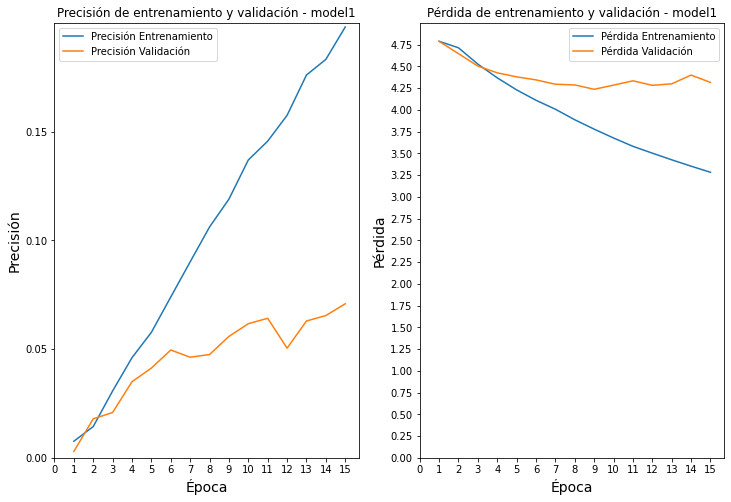

In [29]:
v_tb.accuracy_loss_plot('model1', history1, step_x = 1, lim_sup1 = 0.2, lim_sup2 = 5, step_y1 = 0.05)

En la gráfica de **precisión** se observa un claro *overfitting*, donde el modelo predice en un grado mucho mayor los labels del conjunto de entrenamiento, que los del conjunto de validación. Esto puede deberse a que está aprendiendo patrones no relevantes y se puede decir que el modelo no es generalizado.

Se procede a guardar el modelo para poder utilizarlo en la predicción que se requiera.

In [30]:
mo_tb.guardar_modelo(model1, 'model1')

## Resultados obtenidos
Recall y precisión para Model1

In [39]:
prediccion_model1 = model1.predict(test_imagenes)

In [40]:
lista_predicciones1 = mo_tb.enlistar_predicciones(prediccion_model1)

In [41]:
recall_model1 = recall_score(test_labels, lista_predicciones1, average="macro")
recall_model1

0.07431887421425139

In [42]:
precision_model1 = precision_score(test_labels, lista_predicciones1, average="macro")
precision_model1

0.06931038120197602

Se guardan los datos e hiperparámetros del modelo en un dataframe para posteriormente poder cargarlos a MySQL en una tabla de comparasión (*model_comparasion*).

In [43]:
df_model1 = pd.DataFrame(data=[['Model1',{'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'Conv2D': 2, 'MaxPooling': 2, 'Dropout': 1, 'Flatten': 1, 'Dense': 2, 'Capa salida': 'softmax', 'optimizer': 'adam', 'loss': 'sparce_categorical_crossentropy', 'metrics': 'accuracy'}, recall_model1, precision_model1]], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
df_model1

Modelo                                         Parámetros    Recall  \
0  Model1  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.074319   

     Score  
0  0.06931

In [44]:
model_comparasion = pd.DataFrame(data =[], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
model_comparasion

Empty DataFrame
Columns: [Modelo, Parámetros, Recall, Score]
Index: []

In [45]:
model_comparasion = model_comparasion.append(df_model1, ignore_index=True)

In [46]:
model_comparasion

Modelo                                         Parámetros    Recall  \
0  Model1  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.074319   

     Score  
0  0.06931

## Model2
El segundo modelo será entrenado con imágenes con una única dimensionalidad de color.

In [39]:
model2 = models.Sequential()


model2.add(layers.Conv2D(filters=100,
                         kernel_size=(3,3),
                         input_shape = (64,64,1),
                         activation = 'relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Conv2D(filters=50,
                         kernel_size=(3,3),
                         activation = 'relu'))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(32, activation ='relu'))
model2.add(layers.Dense(120, activation ='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 100)       1000      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 50)        45050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [40]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se realiza un reshape de los datos que entrenarán el modelo para que puedan ser ingresados.

In [41]:
x_train_gray = x_train_gray.reshape(9600, 64, 64, 1)
x_val_gray = x_val_gray.reshape(2400, 64, 64, 1)

In [42]:
epochs = 15

history2 = model2.fit(x = x_train_gray, y=y_train_gray, validation_data=(x_val_gray, y_val_gray), epochs=epochs, verbose=1)

Epoch 1/15
300/300 [==============================] - 88s 292ms/step - loss: 4.7567 - accuracy: 0.0125 - val_loss: 4.7114 - val_accuracy: 0.0167
Epoch 2/15
300/300 [==============================] - 87s 290ms/step - loss: 4.5525 - accuracy: 0.0243 - val_loss: 4.5155 - val_accuracy: 0.0254
Epoch 3/15
300/300 [==============================] - 87s 291ms/step - loss: 4.3338 - accuracy: 0.0464 - val_loss: 4.3863 - val_accuracy: 0.0312
Epoch 4/15
300/300 [==============================] - 88s 294ms/step - loss: 4.1972 - accuracy: 0.0629 - val_loss: 4.3529 - val_accuracy: 0.0450
Epoch 5/15
300/300 [==============================] - 87s 290ms/step - loss: 4.0762 - accuracy: 0.0798 - val_loss: 4.3139 - val_accuracy: 0.0413
Epoch 6/15
300/300 [==============================] - 87s 291ms/step - loss: 3.9630 - accuracy: 0.0967 - val_loss: 4.3280 - val_accuracy: 0.0471
Epoch 7/15
300/300 [==============================] - 88s 295ms/step - loss: 3.8307 - accuracy: 0.1164 - val_loss: 4.3053 - val_ac

In [ ]:
v_tb.accuracy_loss_plot('model2', history2, step_x=1, lim_sup1 = 0.2, lim_sup2= 5, step_y1 = 0.05)

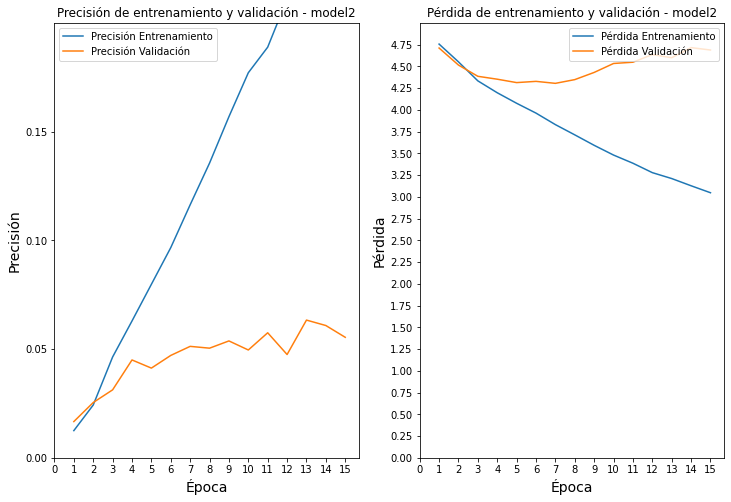

In [43]:
v_tb.accuracy_loss_plot('model2', history2, step_x=1, lim_sup1 = 0.2, lim_sup2= 5, step_y1 = 0.05)

Los resultados son muy similares al primer caso, donde se observa un claro *overfitting*.


Se procede a guardar el modelo para poder utilizarlo en la predicción que se requiera.

In [44]:
mo_tb.guardar_modelo(model2, 'model2')

## Resultados obtenidos
Recall y precisión para Model2

In [47]:
test_imagenes_gray.shape

(8580, 64, 64)

In [48]:
test_imagenes_gray = test_imagenes_gray.reshape(8580, 64, 64, 1)

In [50]:
prediccion_model2 = model2.predict(test_imagenes_gray)

In [51]:
lista_predicciones2 = mo_tb.enlistar_predicciones(prediccion_model2)

In [52]:
recall_model2 = recall_score(test_labels, lista_predicciones2, average="macro")
recall_model2

0.05842747930406759

In [53]:
precision_model2 = precision_score(test_labels, lista_predicciones2, average="macro")
precision_model2

0.05708124022111649

Nuevamente se cargan los datos e hiperparámetros del modelo en la tabla de comparasión.

In [54]:
df_model2 = pd.DataFrame(data=[['Model2',{'Tipo': 'CNN', 'input_shape': (64, 64, 1), 'Conv2D': 2, 'MaxPooling': 2, 'Dropout': 1, 'Flatten': 1, 'Dense': 2, 'Capa salida': 'softmax', 'optimizer': 'adam', 'loss': 'sparce_categorical_crossentropy', 'metrics': 'accuracy'}, recall_model2, precision_model2]], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
df_model2

Modelo                                         Parámetros    Recall  \
0  Model2  {'Tipo': 'CNN', 'input_shape': (64, 64, 1), 'C...  0.058427   

      Score  
0  0.057081

In [55]:
model_comparasion = model_comparasion.append(df_model2, ignore_index=True)

In [56]:
model_comparasion

Modelo                                         Parámetros    Recall  \
0  Model1  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.074319   
1  Model2  {'Tipo': 'CNN', 'input_shape': (64, 64, 1), 'C...  0.058427   

      Score  
0  0.069310  
1  0.057081

## Data Augmentation

Con la finalidad de disminuir el overfitting obtenido en los modelos anteriores, se utiliza la técnica de Data Augmentation.

Volviendo un poco a las raíces del proyecto, se observa que se disponen de 100 imágenes de cada unas de las 120 razas dentro del conjunto **train**. A tales efectos, podría considerarse que la información es algo escasa. Es por esto que podría resultar conveniente aplicar dicha técnica. La misma se basa en aumentar la cantidad de datos disponibles mediante la realización de pequeñas modificaciones a las imágenes, como ser la rotación, el volteo horizonal o vertical, el desplazamiento horizonal o vertical, la variación en su brillo, realizarle zoom, entre otras. De esta manera, se aumentará el número de muestras para entrenar el modelo, y el mismo las tomará como imágenes diferentes.

Con esto se busco lograr un modelo que aprenda de una forma más generalizada, evitando encontrar patrones irrelevantes.

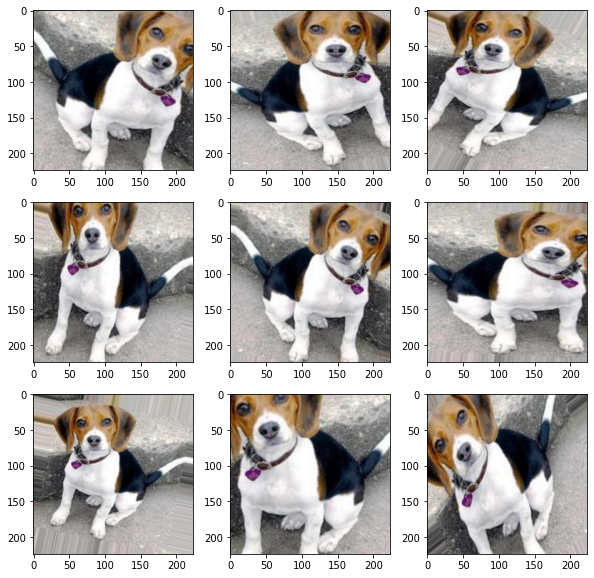

In [54]:
img = load_img(train_dir + os.sep + 'Beagle' + os.sep + 'n02088364_2019.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(
                             shear_range=0.3,
                             zoom_range=0.3,
                             rotation_range = 30,
                             horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
plt.figure(figsize = (10,10))
for i in range(9):
	plt.subplot(3,3,i + 1)
	batch = it.next()
	image = batch[0].astype('uint8')
    
	plt.imshow(image)
plt.savefig('..' + os.sep + 'reports' + os.sep + 'data_augmentation.png')
plt.show()


## Model1_aug

El tercer modelo será entrenado con imágenes con 3 dimensionalidades de color, pero esta vez las mismas serán sometidas a la técnica de *Data Augmentation*, en la búsqueda por obtener un resultado más generalizado.

In [55]:
model1_aug = models.Sequential()


model1_aug.add(layers.Conv2D(filters=100,
                         kernel_size=(3,3),
                         input_shape = (64,64,3),
                         activation = 'relu'))
model1_aug.add(layers.MaxPooling2D(pool_size=(2,2)))
model1_aug.add(layers.Conv2D(filters=50,
                         kernel_size=(3,3),
                         activation = 'relu'))
model1_aug.add(layers.MaxPooling2D(pool_size = (2,2)))
model1_aug.add(layers.Flatten())
model1_aug.add(layers.Dropout(0.25))
model1_aug.add(layers.Dense(32, activation ='relu'))
model1_aug.add(layers.Dense(120, activation ='softmax'))
model1_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 100)       2800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 50)        45050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [56]:
model1_aug.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [57]:
epochs = 15

history1_aug = model1_aug.fit(datagen.flow(x_train, y_train), validation_data=(x_val, y_val), epochs=epochs, verbose=1)

Epoch 1/15
300/300 [==============================] - 87s 290ms/step - loss: 4.7382 - accuracy: 0.0131 - val_loss: 4.6293 - val_accuracy: 0.0167
Epoch 2/15
300/300 [==============================] - 87s 290ms/step - loss: 4.4790 - accuracy: 0.0321 - val_loss: 4.3908 - val_accuracy: 0.0300
Epoch 3/15
300/300 [==============================] - 88s 294ms/step - loss: 4.3134 - accuracy: 0.0444 - val_loss: 4.2791 - val_accuracy: 0.0312
Epoch 4/15
300/300 [==============================] - 87s 289ms/step - loss: 4.2179 - accuracy: 0.0499 - val_loss: 4.2036 - val_accuracy: 0.0500
Epoch 5/15
300/300 [==============================] - 87s 291ms/step - loss: 4.1390 - accuracy: 0.0585 - val_loss: 4.1845 - val_accuracy: 0.0463
Epoch 6/15
300/300 [==============================] - 88s 292ms/step - loss: 4.0879 - accuracy: 0.0610 - val_loss: 4.2302 - val_accuracy: 0.0479
Epoch 7/15
300/300 [==============================] - 87s 289ms/step - loss: 4.0502 - accuracy: 0.0681 - val_loss: 4.0584 - val_ac

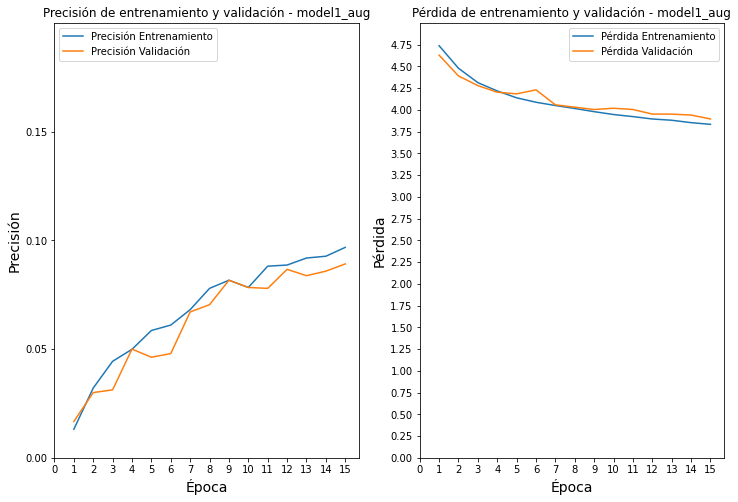

In [82]:
v_tb.accuracy_loss_plot('model1_aug', history1_aug, step_x = 1, lim_sup1 =0.2, lim_sup2 = 5, step_y1 = 0.05)

En esta situación se puede apreciar como las curvas tanto de **precisión** como **pérdida** se ajustan mucho mejor para los casos de entrenamiento y validación, lo cual significa que se trata de un modelo más generalizado, prácticamente sin *overfitting*.


Se procede a guardar el modelo para poder utilizarlo en la predicción que se requiera.

In [59]:
mo_tb.guardar_modelo(model1_aug, 'model1_aug')

## Resultados obtenidos
Recall y precisión para Model1_aug

In [58]:
prediccion_model1_aug = model1_aug.predict(test_imagenes)

In [59]:
lista_predicciones1_aug = mo_tb.enlistar_predicciones(prediccion_model1_aug)

In [60]:
recall_model1_aug = recall_score(test_labels, lista_predicciones1_aug, average="macro")
recall_model1_aug

0.09621550231158654

In [61]:
precision_model1_aug = precision_score(test_labels, lista_predicciones1_aug, average="macro")
precision_model1_aug

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.08050245829730963

Nuevamente se cargan los datos e hiperparámetros del modelo en la tabla de comparasión.

In [62]:
df_model1_aug = pd.DataFrame(data=[['Model1_aug',{'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'Conv2D': 2, 'MaxPooling': 2, 'Dropout': 1, 'Flatten': 1, 'Dense': 2, 'Capa salida': 'softmax', 'optimizer': 'adam', 'loss': 'sparce_categorical_crossentropy', 'metrics': 'accuracy', 'Data Augmentation': {'shear_range': 0.3, 'zoom_range': 0.3, 'rotation_range': 30, 'horizontal_flip': True}}, recall_model1_aug, precision_model1_aug]], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
df_model1_aug

Modelo                                         Parámetros    Recall  \
0  Model1_aug  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.096216   

      Score  
0  0.080502

In [63]:
model_comparasion = model_comparasion.append(df_model1_aug, ignore_index=True)

In [64]:
model_comparasion

Modelo                                         Parámetros    Recall  \
0      Model1  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.074319   
1      Model2  {'Tipo': 'CNN', 'input_shape': (64, 64, 1), 'C...  0.058427   
2  Model1_aug  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.096216   

      Score  
0  0.069310  
1  0.057081  
2  0.080502

## Model4

El cuarto modelo será entrenado con imágenes con 3 dimensionalidades de color, sometidas a la técnica de *Data Augmentation*, la cual entregó buenos resultados en referencia a la generalización del modelo. Se ha modificado la composición de las capas y números de neuronas con la finalidad de intentar aumentar los resultados de *score* obtenidos.

In [68]:
model4 = models.Sequential()
model4.add(layers.Conv2D(512, (3, 3), padding='same', use_bias=False, input_shape=(64, 64, 3)))
model4.add(layers.BatchNormalization(axis=3, scale=False))
model4.add(layers.Dense(360, activation = "relu"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Conv2D(64, (3, 3), padding='same'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(50, activation='relu'))
model4.add(layers.Dense(120, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 512)       13824     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 512)       1536      
_________________________________________________________________
dense_6 (Dense)              (None, 64, 64, 360)       184680    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 360)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 360)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        103712    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)       

In [69]:
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [70]:
history4 = model4.fit(datagen.flow(x_train, y_train), validation_data=(x_val, y_val), epochs=epochs, verbose=1)

Epoch 1/15
300/300 [==============================] - 935s 3s/step - loss: 4.7916 - accuracy: 0.0073 - val_loss: 4.7893 - val_accuracy: 0.0037
Epoch 2/15
300/300 [==============================] - 920s 3s/step - loss: 4.7878 - accuracy: 0.0097 - val_loss: 4.7909 - val_accuracy: 0.0029
Epoch 3/15
300/300 [==============================] - 923s 3s/step - loss: 4.7876 - accuracy: 0.0089 - val_loss: 4.7922 - val_accuracy: 0.0029
Epoch 4/15
300/300 [==============================] - 923s 3s/step - loss: 4.7874 - accuracy: 0.0086 - val_loss: 4.7934 - val_accuracy: 0.0029
Epoch 5/15
300/300 [==============================] - 924s 3s/step - loss: 4.7872 - accuracy: 0.0097 - val_loss: 4.7945 - val_accuracy: 0.0029
Epoch 6/15
300/300 [==============================] - 923s 3s/step - loss: 4.7871 - accuracy: 0.0090 - val_loss: 4.7955 - val_accuracy: 0.0029
Epoch 7/15
300/300 [==============================] - 924s 3s/step - loss: 4.7871 - accuracy: 0.0090 - val_loss: 4.7962 - val_accuracy: 0.0029

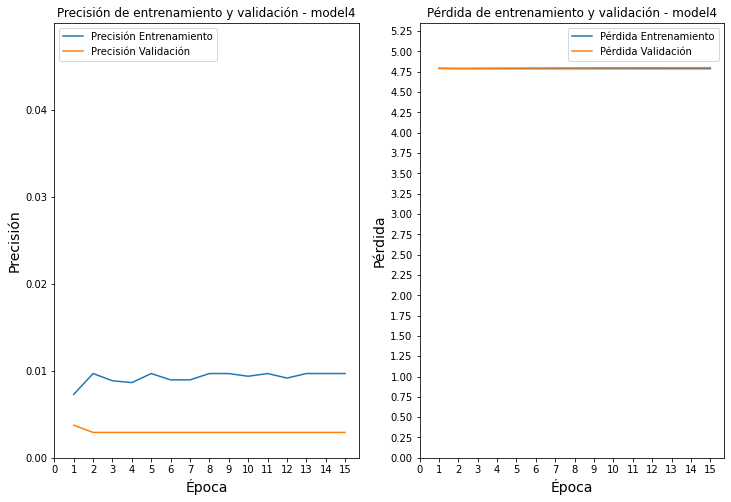

In [87]:
v_tb.accuracy_loss_plot('model4', history4, step_x = 1, lim_sup1 =0.05, lim_sup2 = 5.35, step_y1 = 0.01)

Los resultados para éste último modelo son inferiores a los entrenados anteriormente.

Se procede a guardar el modelo para poder utilizarlo en la predicción que se requiera.

In [72]:
mo_tb.guardar_modelo(model4, 'model4')

## Resultados obtenidos
Recall y precisión para Model4

In [66]:
prediccion_model4 = model4.predict(test_imagenes)

In [67]:
lista_predicciones4 = mo_tb.enlistar_predicciones(prediccion_model4)

In [68]:
recall_model4 = recall_score(test_labels, lista_predicciones4, average="macro")
recall_model4

0.008333333333333333

In [69]:
precision_model4 = precision_score(test_labels, lista_predicciones4, average="macro")
precision_model4

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.9533799533799534e-05

Nuevamente se cargan los datos e hiperparámetros del modelo en la tabla de comparasión.

In [70]:
df_model4 = pd.DataFrame(data=[['Model4',{'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'Conv2D': 4, 'BatchNormalization': 1, 'MaxPooling': 3, 'Dropout': 4, 'Flatten': 1, 'Dense': 3, 'Capa salida': 'softmax', 'optimizer': 'adam', 'loss': 'sparce_categorical_crossentropy', 'metrics': 'accuracy', 'Data Augmentation': {'shear_range': 0.3, 'zoom_range': 0.3, 'rotation_range': 30, 'horizontal_flip': True}}, recall_model4, precision_model4]], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
df_model4

Modelo                                         Parámetros    Recall  \
0  Model4  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.008333   

     Score  
0  0.00005

In [71]:
model_comparasion = model_comparasion.append(df_model4, ignore_index=True)

In [72]:
model_comparasion

Modelo                                         Parámetros    Recall  \
0      Model1  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.074319   
1      Model2  {'Tipo': 'CNN', 'input_shape': (64, 64, 1), 'C...  0.058427   
2  Model1_aug  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.096216   
3      Model4  {'Tipo': 'CNN', 'input_shape': (64, 64, 3), 'C...  0.008333   

      Score  
0  0.069310  
1  0.057081  
2  0.080502  
3  0.000050

In [73]:
f_tb.df_to_csv(model_comparasion, 'model_comparasion.csv')

## Obteniendo metadata

Se obtiene un dataframe con la información relevante del conjunto de datos utilizado para confeccionar los distintos modelos. En él encontramos información como los nombres de ficheros, resolución en la que se disponía cada imagen y su respectiva etiqueta.

In [88]:
df_metadata_train = f_tb.df_metadata(razas, train_dir)

In [89]:
df_metadata_train

Filename  Resolución           Etiqueta
0      n02110627_10225.jpg  (224, 224)      Affenpinscher
1      n02110627_10437.jpg  (224, 224)      Affenpinscher
2      n02110627_10439.jpg  (224, 224)      Affenpinscher
3      n02110627_10447.jpg  (224, 224)      Affenpinscher
4      n02110627_10848.jpg  (224, 224)      Affenpinscher
...                    ...         ...                ...
11995    n02094433_889.jpg  (224, 224)  Yorkshire Terrier
11996   n02094433_9618.jpg  (224, 224)  Yorkshire Terrier
11997    n02094433_962.jpg  (224, 224)  Yorkshire Terrier
11998    n02094433_967.jpg  (224, 224)  Yorkshire Terrier
11999   n02094433_9739.jpg  (224, 224)  Yorkshire Terrier

[12000 rows x 3 columns]

In [90]:
df_metadata_test = f_tb.df_metadata(razas, test_dir)

In [91]:
df_metadata_test

Filename  Resolución           Etiqueta
0     n02110627_10147.jpg  (224, 224)      Affenpinscher
1     n02110627_10185.jpg  (224, 224)      Affenpinscher
2     n02110627_10680.jpg  (224, 224)      Affenpinscher
3     n02110627_10787.jpg  (224, 224)      Affenpinscher
4     n02110627_11262.jpg  (224, 224)      Affenpinscher
...                   ...         ...                ...
8575   n02094433_8535.jpg  (224, 224)  Yorkshire Terrier
8576   n02094433_8580.jpg  (224, 224)  Yorkshire Terrier
8577   n02094433_8977.jpg  (224, 224)  Yorkshire Terrier
8578    n02094433_923.jpg  (224, 224)  Yorkshire Terrier
8579     n02094433_96.jpg  (224, 224)  Yorkshire Terrier

[8580 rows x 3 columns]

In [92]:
df_metadata = pd.concat([df_metadata_train, df_metadata_test], ignore_index= True)

In [93]:
df_metadata

Filename  Resolución           Etiqueta
0      n02110627_10225.jpg  (224, 224)      Affenpinscher
1      n02110627_10437.jpg  (224, 224)      Affenpinscher
2      n02110627_10439.jpg  (224, 224)      Affenpinscher
3      n02110627_10447.jpg  (224, 224)      Affenpinscher
4      n02110627_10848.jpg  (224, 224)      Affenpinscher
...                    ...         ...                ...
20575   n02094433_8535.jpg  (224, 224)  Yorkshire Terrier
20576   n02094433_8580.jpg  (224, 224)  Yorkshire Terrier
20577   n02094433_8977.jpg  (224, 224)  Yorkshire Terrier
20578    n02094433_923.jpg  (224, 224)  Yorkshire Terrier
20579     n02094433_96.jpg  (224, 224)  Yorkshire Terrier

[20580 rows x 3 columns]

In [94]:
df_metadata = df_metadata.rename_axis('id').reset_index()

In [95]:
df_metadata

id             Filename  Resolución           Etiqueta
0          0  n02110627_10225.jpg  (224, 224)      Affenpinscher
1          1  n02110627_10437.jpg  (224, 224)      Affenpinscher
2          2  n02110627_10439.jpg  (224, 224)      Affenpinscher
3          3  n02110627_10447.jpg  (224, 224)      Affenpinscher
4          4  n02110627_10848.jpg  (224, 224)      Affenpinscher
...      ...                  ...         ...                ...
20575  20575   n02094433_8535.jpg  (224, 224)  Yorkshire Terrier
20576  20576   n02094433_8580.jpg  (224, 224)  Yorkshire Terrier
20577  20577   n02094433_8977.jpg  (224, 224)  Yorkshire Terrier
20578  20578    n02094433_923.jpg  (224, 224)  Yorkshire Terrier
20579  20579     n02094433_96.jpg  (224, 224)  Yorkshire Terrier

[20580 rows x 4 columns]

In [96]:
f_tb.df_to_csv(df_metadata, 'df_metadata.csv')

## Insertando tabla de model_comparasion a MySQL

Se inserta la tabla de comparasión de modelos en la BBDD de MySQL

In [74]:
sql_tb.enviar_tabla_SQL('model_comparasion', 'model_comparasion.csv')

Connected to MySQL server [y6571256d_ds_april_2021_db]


'La tabla ha sido insertada correctamente en la base de datos.'

## Predicción

Utilizando el modelo "model1_aug", se realizará una predicción cargando una imagen y observando la raza de la cual el modelo predice que se trata.

In [98]:
modelo_prediccion = mo_tb.cargar_modelo('model1_aug')

In [99]:
foto_predecir = f_tb.preparar_imagen_predecir('n02088364_2572.jpg')

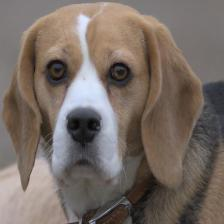

In [111]:
foto = Image.open('..' + os.sep + 'data' + os.sep + 'fotos_perros' + os.sep + 'to_predict' + os.sep + 'beagle.jpg')
foto

In [100]:
mo_tb.predecir(modelo_prediccion,foto_predecir)

'Pembroke'

## Conclusión

Con las redes neuronales utilizadas se han obtenido scores muy por debajo de lo esperado, lo que lleva en la mayoría de los casos a predicciones erróneas.

En el afán de mejorar dichas predicciones, podrían tomarse las siguientes medidas:
- Utilizar diferentes estructuras de redes con mayor profundidad, aunque esto no asegura mejorar los resultados.
- Utilizar GridSearch para ajustar lo mejor posible todos los hiperparámetros de los modelos.
- Utilizar Tranfer Learning (VGG16, ResNet50), siendo ésta probablemente la medida que mayores repercusiones favorables tenga sobre los modelos predictivos.

## Pie Chart

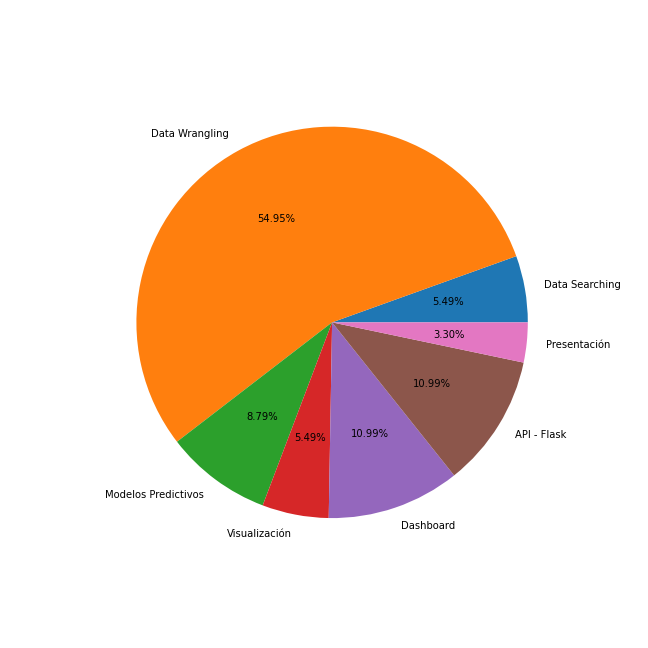

In [78]:
pie_chart = Image.open('..' + os.sep + 'reports' + os.sep + 'piechart_tiempo.png')
pie_chart